# Communicate Data Findings: Loans Data Explanatory Analysis
### _by `Owhonda Moses`_

## Investigation Overview

In this investigation, I wanted to summarize the characteristics of features that can affect the annual percentage rate (APR) and outcome of a loan. The main focus was on Credit score, Borrower APR, Income, Prosper Score, Loan Status and Loan Amount.

## Dataset Overview

The original dataset consisted of 113,937 loans with 81 variables on each loan. Prosper score was used as a criteria to subset the dataframe, which reduced the dataset to 84,853 loans with 14 data points selected for the analysis.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe and make a copy
df_loans = pd.read_csv('prosperLoanData.csv')
loans = df_loans.copy()

In [3]:
# Select variables of interest for our analysis & subset dataframe
loans = loans[['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus',
            'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'OpenCreditLines', 'TradesNeverDelinquent (percentage)',
            'RevolvingCreditBalance','BankcardUtilization', 'TotalTrades', 'IncomeRange', 'LoanOriginalAmount']]

# Rename 'ListingCategory (numeric)' and 'TradesNeverDelinquent (percentage)' columns
loans = loans.rename(columns = {'ListingCategory (numeric)':'ListingCategory',
                                'TradesNeverDelinquent (percentage)':'TradesNeverDelinquent'})

In [4]:
# Select only entries with ProsperScore values in dataframe
loans = loans[loans['ProsperScore'].notna()]

In [5]:
# Get the indexes of entries with Income range of '$0' and 'Not employed'
not_employed_status = loans[loans.IncomeRange == '$0'].EmploymentStatus.index
not_employed_income = loans[loans.IncomeRange == 'Not employed'].IncomeRange.index

# Change employment status to 'Not employed' for '$0' income range
# Change 'Not employed' income range to '$0' 
loans.loc[not_employed_status, 'EmploymentStatus'] = 'Not employed'
loans.loc[not_employed_income, 'IncomeRange'] = '$0'

In [6]:
# Convert CreditScore columns to int datatype
loans['CreditScoreRangeLower'] = loans['CreditScoreRangeLower'].astype(int)
loans['CreditScoreRangeUpper'] = loans['CreditScoreRangeUpper'].astype(int)

# Combine CreditScoreRangeLower & CreditScoreRangeUpper into one column 
# Drop CreditScoreRangeLower & CreditScoreRangeUpper columns from dataframe
loans['CreditScoreRange'] = loans['CreditScoreRangeLower'].astype(str)+'-'+loans['CreditScoreRangeUpper'].astype(str)
loans = loans.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis=1)

In [7]:
# Convert CreditScoreRange, ProsperScore and Income range into ordered category datatypes
# Convert Term, Loan Status, Listing Category and Employment Status into category datatypes

ordinal_var_dict = {'ProsperScore': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0],
                   'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                   'CreditScoreRange': ['600-619', '620-639', '640-659', '660-679', '680-699', '700-719', '720-739', '740-759',
                                       '760-779', '780-799', '800-819', '820-839', '840-859', '860-879', '880-899']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)
    
loans['Term'] = loans['Term'].astype('category')
loans['LoanStatus'] = loans['LoanStatus'].astype('category')
loans['ListingCategory'] = loans['ListingCategory'].astype('category')
loans['EmploymentStatus'] = loans['EmploymentStatus'].astype('category')

## Distribution of Credit Score Ranges
> Credit score peaks between 660 - 719 with the most frequent range between 660 - 679. There is a slight right skew in the distribution with higher credit scores having less borrowers.

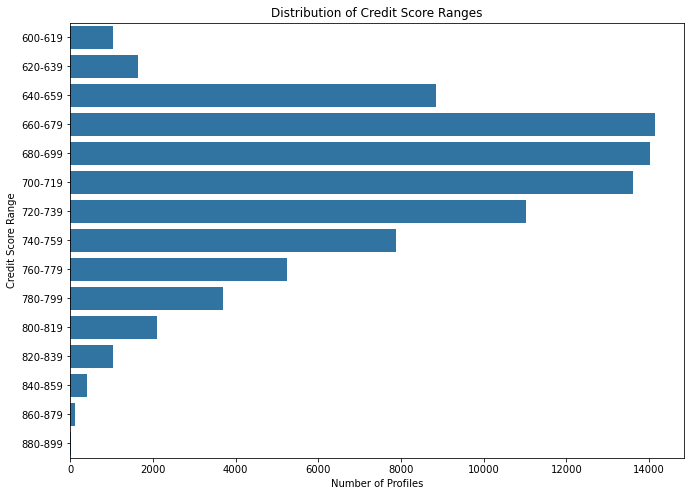

In [8]:
# Bar plot of credit score ranges
plt.figure(figsize=(11,8))
base_color = sns.color_palette()[0]
sns.countplot(data=loans, y='CreditScoreRange', color=base_color)
plt.xlabel('Number of Profiles')
plt.ylabel('Credit Score Range')
plt.title('Distribution of Credit Score Ranges');

## Distribution of Annual Percentage Rates
> APR (Annual Percentage Rate) represents the total cost of a loan to a borrower. There is a large spike in frequency at the bar around the 0.35-0.36 range, followed by a steep drop. This indicates that most borrowers in our dataset have a high APR of 35%-36%.

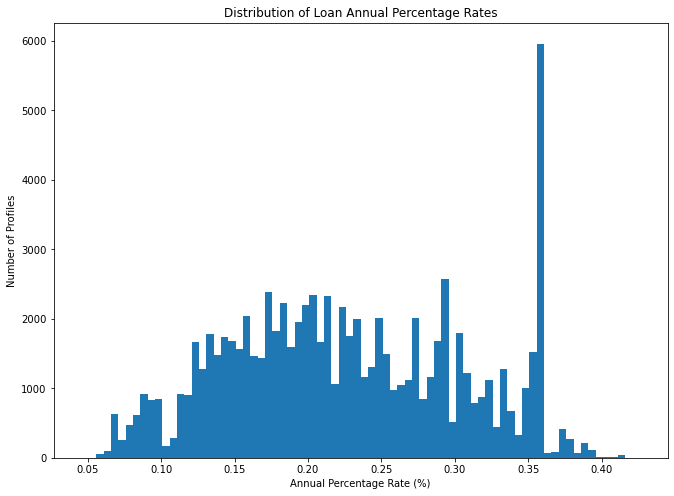

In [9]:
# Plot a histogram to show distribution of Borrower APR
plt.figure(figsize=(11,8))
bin_size = 0.005
bins = np.arange(loans.BorrowerAPR.min(), loans.BorrowerAPR.max()+bin_size, bin_size)

plt.hist(data=loans, x='BorrowerAPR', bins=bins)
plt.xlabel('Annual Percentage Rate (%)')
plt.ylabel('Number of Profiles')
plt.title('Distribution of Loan Annual Percentage Rates');

## Distribution of Income Ranges
> Income ranges peak within `$50,000 - $74,999`, followed by the `$25,000 - $49,999` range, and we see that folks with $0 income are among the least borrowers. 

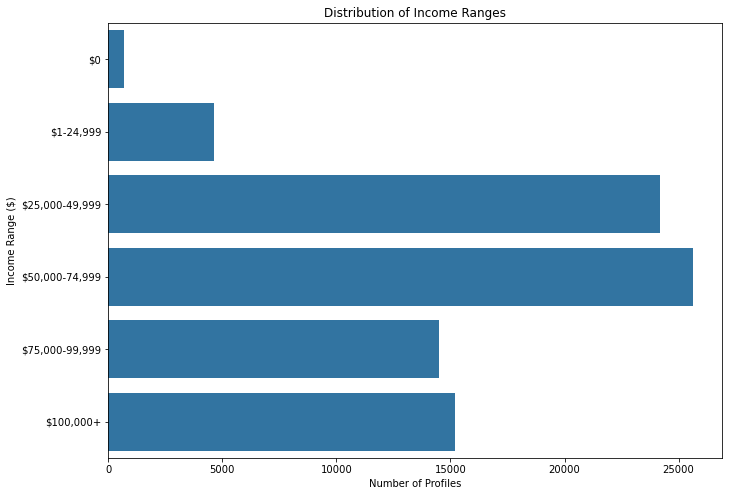

In [10]:
# Plot distribution of Income ranges
base_color = sns.color_palette()[0]
plt.figure(figsize=(11,8))
sns.countplot(data=loans, y='IncomeRange', color=base_color)
plt.xlabel('Number of Profiles')
plt.ylabel('Income Range ($)')
plt.title('Distribution of Income Ranges');

## Distribution of Prosper Score
> Most of the borrowers have a Prosper score of 4.0, 6.0 and 8.0. We see borrowers with the lowest Prosper score of 1.0 accessed the least number of loans.

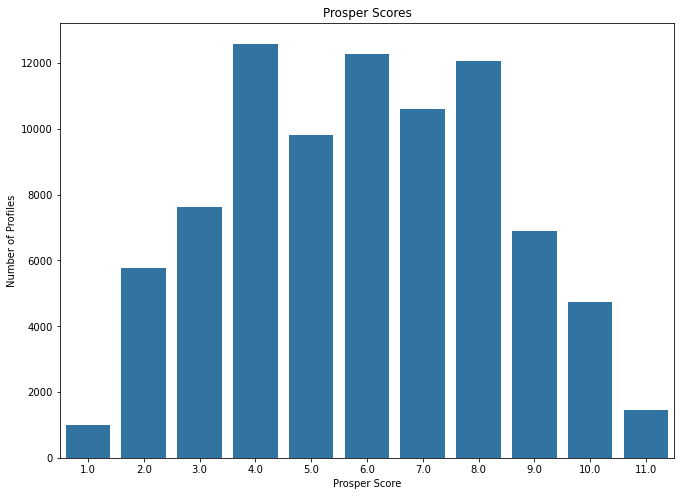

In [11]:
# Plot distribution of Prosper scores
base_color = sns.color_palette()[0]
plt.figure(figsize=(11,8))
sns.countplot(data=loans, x='ProsperScore', color=base_color)
plt.ylabel('Number of Profiles')
plt.xlabel('Prosper Score')
plt.title('Prosper Scores');

## Credit Score Range vs Income Range
> A lot of credit profiles in the credit score peak range of 660-699 earn between `$25,000-$74,999`. Generally, the frequency of income earners on a loan decreases with increasing credit scores

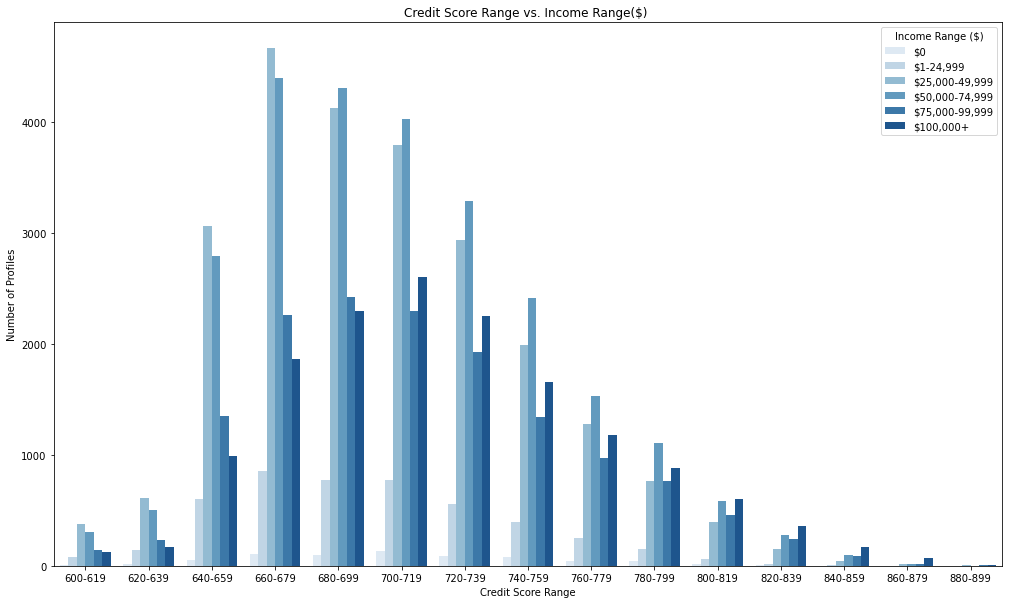

In [12]:
# Create a clustered barchart of credit score against income range
plt.figure(figsize=(17,10))
sns.countplot(data=loans, x='CreditScoreRange', hue='IncomeRange', palette='Blues')
plt.xlabel('Credit Score Range')
plt.ylabel('Number of Profiles')
plt.title('Credit Score Range vs. Income Range($) ')
plt.legend(loc=1, title='Income Range ($)');

## Credit Score Range vs Annual Percentage Rate

> In increasing order of credit score ranges, there are steady reductions in annual percentage rates, which could be one of the perks of having a higher credit score.

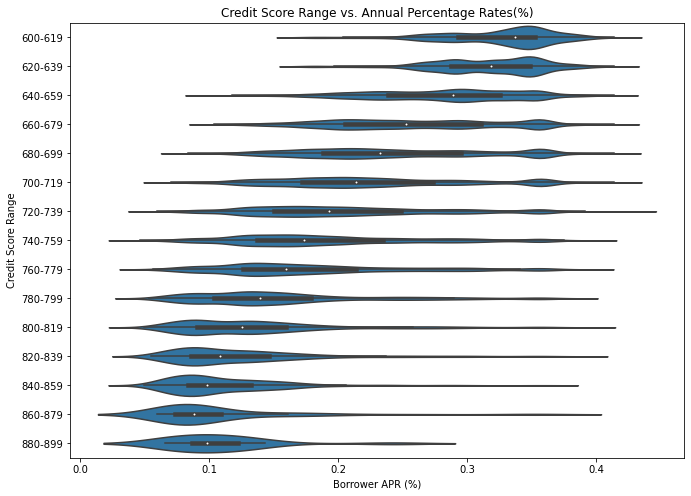

In [13]:
# Create a violin plot of credit score against APR
base_color = sns.color_palette()[0]
plt.figure(figsize=(11,8))
sns.violinplot(data=loans, y='CreditScoreRange', x='BorrowerAPR', color=base_color)
plt.ylabel('Credit Score Range')
plt.xlabel('Borrower APR (%)')
plt.title('Credit Score Range vs. Annual Percentage Rates(%)');

## Credit Score Range vs Prosper Score

> Slight positive correlation is observed between Credit score range and prosper score. The highest prosper scores seem to lie  predominantly between the credit score range of 700 - 799.

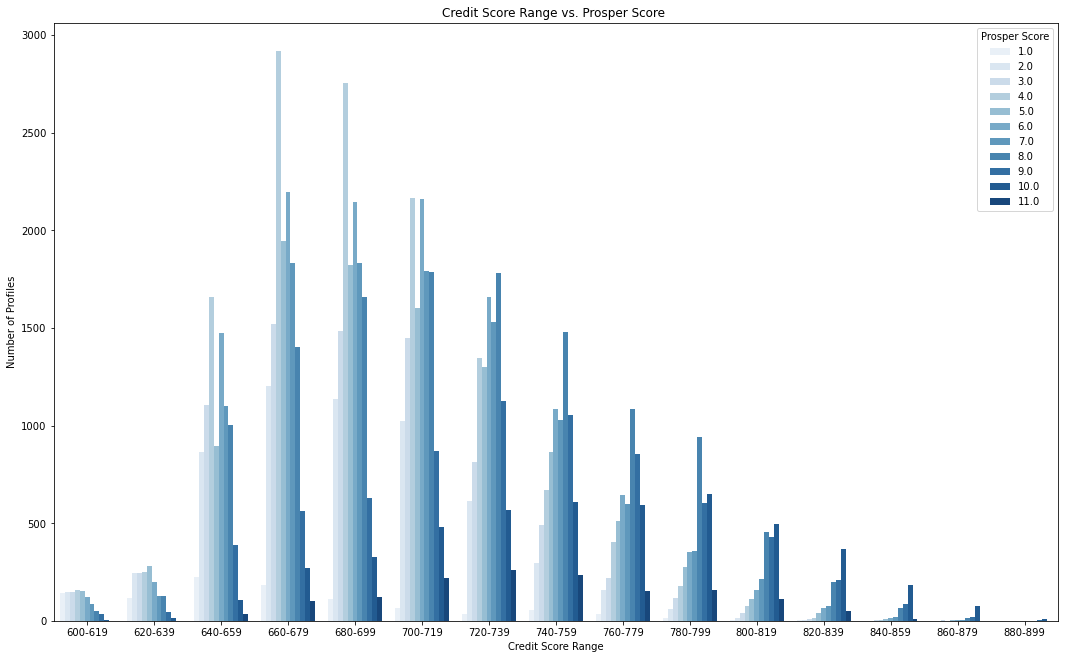

In [14]:
# Create a clustered barchart of credit score against income range
plt.figure(figsize=(18,11))
sns.countplot(data=loans, x='CreditScoreRange', hue='ProsperScore', palette='Blues')
plt.xlabel('Credit Score Range')
plt.ylabel('Number of Profiles')
plt.title('Credit Score Range vs. Prosper Score ')
plt.legend(loc=1, title='Prosper Score');

## Credit Score Range and Borrower APR by Income Range

> There is an interaction effect between credit score range, borrower annual percentage rates and income range. Income range strengthens the negative relationship between the main features. It is highly suggested that borrowers with lesser income seem to incur higher annual percentage rates on their loans with `$0` income earners having the highest APRs.

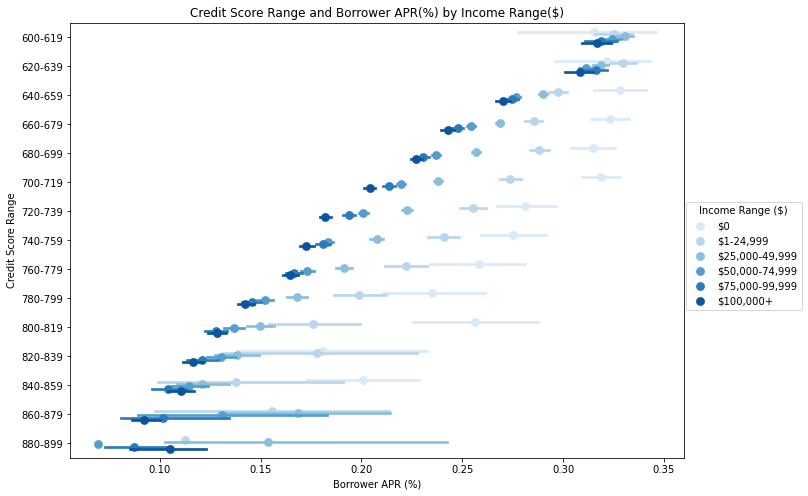

In [15]:
# Create a pointplot showing credit score and borrower APR by income ranges
plt.figure(figsize=(11,8))
sns.pointplot(data=loans, y='CreditScoreRange', x='BorrowerAPR', hue='IncomeRange', palette='Blues',
                  linestyles='', dodge=0.4)
plt.ylabel('Credit Score Range')
plt.xlabel('Borrower APR (%)')
plt.title('Credit Score Range and Borrower APR(%) by Income Range($)')
plt.legend(bbox_to_anchor=(1.2,0.6), title='Income Range ($)');

## Credit Score Range and Borrower APR by Loan Status

> The staggering high number of currently active loans obscured insights into the other loan status and so it was excluded from this visuals. We see that most loans that were either delinquent, defaulted or charged off had higher annual percentage rates and credit profiles with high credit scores between 840-899 seldom had delinquent or defaulted loans.

In [16]:
# Create a new column for loan status showing all late loans as 'Past Due'
loans['status'] = loans['LoanStatus'].astype(str)
loans_past = loans[(loans['status'] == 'Past Due (1-15 days)') | (loans['status'] == 'Past Due (31-60 days)')
              | (loans['status'] == 'Past Due (61-90 days)') | (loans['status'] == 'Past Due (91-120 days)')
              | (loans['status'] == 'Past Due (16-30 days)') | (loans['status'] == 'Past Due (>120 days)')].status.index
loans.loc[loans_past, 'status'] = 'Past Due'

In [17]:
# Get the entries of loan status excepting current loans
loan_status = loans[(loans['status'] == 'Past Due') | (loans['status'] == 'Chargedoff') | (loans['status'] == 'Defaulted')
                    | (loans['status'] == 'FinalPaymentInProgress') | (loans['status'] == 'Completed')]

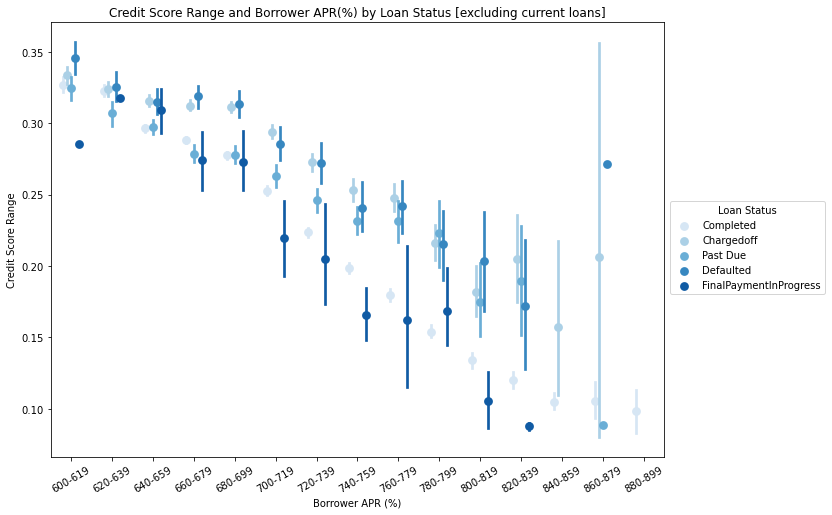

In [18]:
# Create a pointplot showing credit score and borrower APR by loan status excluding current loans
plt.figure(figsize=(11,8))
status_order = loan_status.status.value_counts().index
sns.pointplot(data=loan_status, x='CreditScoreRange', y='BorrowerAPR', hue='status', hue_order=status_order, palette='Blues',
                  linestyles='', dodge=0.4)
plt.ylabel('Credit Score Range')
plt.xlabel('Borrower APR (%)')
plt.title('Credit Score Range and Borrower APR(%) by Loan Status [excluding current loans]')
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.27,0.6), title='Loan Status');

## Credit Score Range and Borrower APR by Loan Amount

> From our scatterplot, we see that larger loan amounts attracted better rates, and the majority of loans with smaller amounts lied around the 30%-40% annual percentage rates. We also see that borrowers with a credit score higher than 740 accessed much larger loans.

In [19]:
# Define a function to set jitters
def jitter(ax):
    """ To offset datapoints and create jitters. """
    offsets = ax.get_offsets()
    offsets[:, 0] += np.random.uniform(-0.2, 0.2, offsets.shape[0]) #jitter along the x-axis with a precision of 0.2
    ax.set_offsets(offsets)

In [20]:
# Define a function to assign axes labels and x-axis limits
def plot(plt, title, xlabel, ylabel):
    """Quick hack for assigning labels """
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    xmin, xmax = plt.xlim() 
    plt.xlim(xmin-0.01, xmax+0.01) # make room for jitters
    plt.xticks(rotation=30)

In [21]:
# Create dataframe with ascending order of credit scores
credit = loans.sort_values('CreditScoreRange')

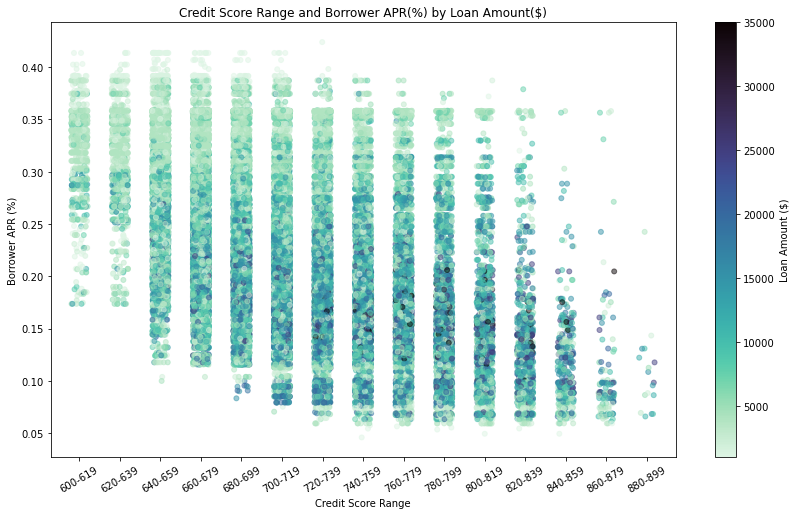

In [22]:
# Plot a scatter plot showing credit score range and borrower APR by loan amount
plt.figure(figsize=(14,8))
ax = plt.scatter(data=credit, x='CreditScoreRange', y='BorrowerAPR', c='LoanOriginalAmount', s=25, cmap='mako_r', alpha=.5);
jitter(ax)
plot(plt, 'Credit Score Range and Borrower APR(%) by Loan Amount($)', 'Credit Score Range', 'Borrower APR (%)')
norm = plt.Normalize(credit['LoanOriginalAmount'].min(), credit['LoanOriginalAmount'].max())
sm = plt.cm.ScalarMappable(cmap='mako_r', norm=norm)
sm.set_array([])
ax.figure.colorbar(sm).set_label('Loan Amount ($)');

In [ ]:
!jupyter nbconvert Loans_Exploration_Part2.ipynb --to slides --post serve --no-input --no-prompt